# Import lib


In [1]:
import pandas as pd
import numpy as np
import cv2

import tensorflow
from tensorflow import keras

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [2]:
train_path = 'archive/new_dataset/train'
test_path = 'archive/new_dataset/test'

In [3]:
classes = glob('archive/new_dataset/train/*')

In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [6]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Modified AlexNet

In [7]:
# modified Alexnet as given in the paper 
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(5,activation='softmax')    
])

In [8]:
# compling the model with loss, optimiser and metrics
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tensorflow.optimizers.SGD(learning_rate=0.001), 
    metrics=['accuracy']    
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0

In [20]:
# using test set in place of val set 
# val loss and accuracy is test loss and accuracy
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Epoch 1/50
46/46 [==============================] - 65s 1s/step - loss: 1.3042 - accuracy: 0.4858 - val_loss: 1.2234 - val_accuracy: 0.4925
Epoch 2/50
46/46 [==============================] - 35s 747ms/step - loss: 1.2221 - accuracy: 0.4981 - val_loss: 1.1377 - val_accuracy: 0.5975
Epoch 3/50
46/46 [==============================] - 35s 761ms/step - loss: 1.1830 - accuracy: 0.5241 - val_loss: 1.1577 - val_accuracy: 0.4925
Epoch 4/50
46/46 [==============================] - 35s 758ms/step - loss: 1.1688 - accuracy: 0.5306 - val_loss: 1.0681 - val_accuracy: 0.6726
Epoch 5/50
46/46 [==============================] - 35s 758ms/step - loss: 1.1472 - accuracy: 0.5381 - val_loss: 1.0741 - val_accuracy: 0.5020
Epoch 6/50
46/46 [==============================] - 35s 766ms/step - loss: 1.1192 - accuracy: 0.5640 - val_loss: 1.0193 - val_accuracy: 0.5553
Epoch 7/50
46/46 [==============================] - 35s 763ms/step - loss: 1.0884 - accuracy: 0.5784 - val_loss: 1.0305 - val_accuracy: 0.5362
Ep

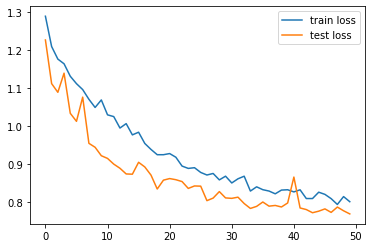

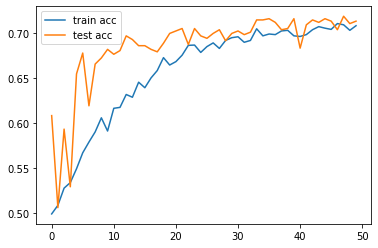

In [11]:
#old dataset
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()

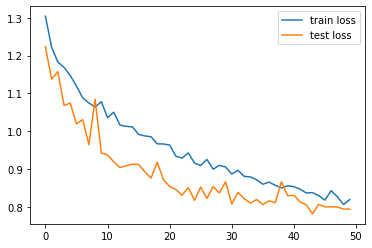

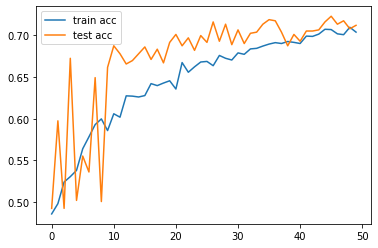

In [21]:
#new dataset
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()